# 1. Import Libs

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder,
    OneHotEncoder,
    StandardScaler,
    MinMaxScaler
)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

np.random.seed(123)

In [ ]:
data = pd.read_csv('MemberActivity.csv')
data.head()

,Age,gender,occupation,education,lifestyle,favorite,zone,activity,month,place
0,34,female,employee,graduate,family,family,Watthana,cooking,1,Cooking Studio Town in Town
1,63,female,business,bachelor,family,travel,Yan Nawa,cooking,1,Cooking Studio Town in Town
2,37,female,employee,bachelor,family,travel,Watthana,cooking,1,Cooking Studio Town in Town
3,51,female,business,bachelor,family,family,Lat Phrao,cooking,1,Cooking Studio Town in Town
4,61,female,business,bachelor,family,family,Suan Luang,cooking,1,Cooking Studio Town in Town


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4124 entries, 0 to 4123
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Age         4124 non-null   object
 1   gender      4124 non-null   object
 2   occupation  4124 non-null   object
 3   education   4124 non-null   object
 4   lifestyle   4124 non-null   object
 5   favorite    4124 non-null   object
 6   zone        4124 non-null   object
 7   activity    4124 non-null   object
 8   month       4124 non-null   int64 
 9   place       4124 non-null   object
dtypes: int64(1), object(9)
memory usage: 322.3+ KB


In [ ]:
data.describe()

,month
count,4124.000000
mean,5.705626
std,3.644812
min,1.000000
25%,2.000000
50%,6.000000
75%,9.000000
max,12.000000


In [ ]:
for column in data.columns:
    # Use .value_counts() on the current column to get its unique values and their counts
    value_counts = data[column].value_counts()

    # Print the results for the current column
    print(f"--- Value Counts for: {column} ---")
    print(value_counts)
    print("\n") # Add a newline for better readability between columns

--- Value Counts for: Age ---
Age
51         137
48         135
47         133
49         133
52         131
          ... 
#VALUE!      1
145          1
-64          1
79           1
76           1
Name: count, Length: 80, dtype: int64


--- Value Counts for: gender ---
gender
female    2643
male      1481
Name: count, dtype: int64


--- Value Counts for: occupation ---
occupation
business      1354
employee      1287
other          420
student        374
official       254
housewife      161
enterprise     120
freelance      116
retire          29
unemployed       9
Name: count, dtype: int64


--- Value Counts for: education ---
education
bachelor        2039
graduate         720
secondary        584
other            323
diploma          244
primary          199
kindergarten      15
Name: count, dtype: int64


--- Value Counts for: lifestyle ---
lifestyle
family        1340
party         1009
simplicity     818
technology     490
other          276
workaholic     191
Name: count, dty

In [ ]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data.dropna(subset=['Age'], inplace=True)

# 3. Now that the column is clean and purely numeric, you can safely convert it to an integer.
data['Age'] = data['Age'].astype(int)

# Now the 'Age' column is a clean integer type
print("Column conversion successful!")
print("The new data type for 'Age' is:", data['Age'].dtype)

Column conversion successful!
The new data type for 'Age' is: int64


# Data Viz

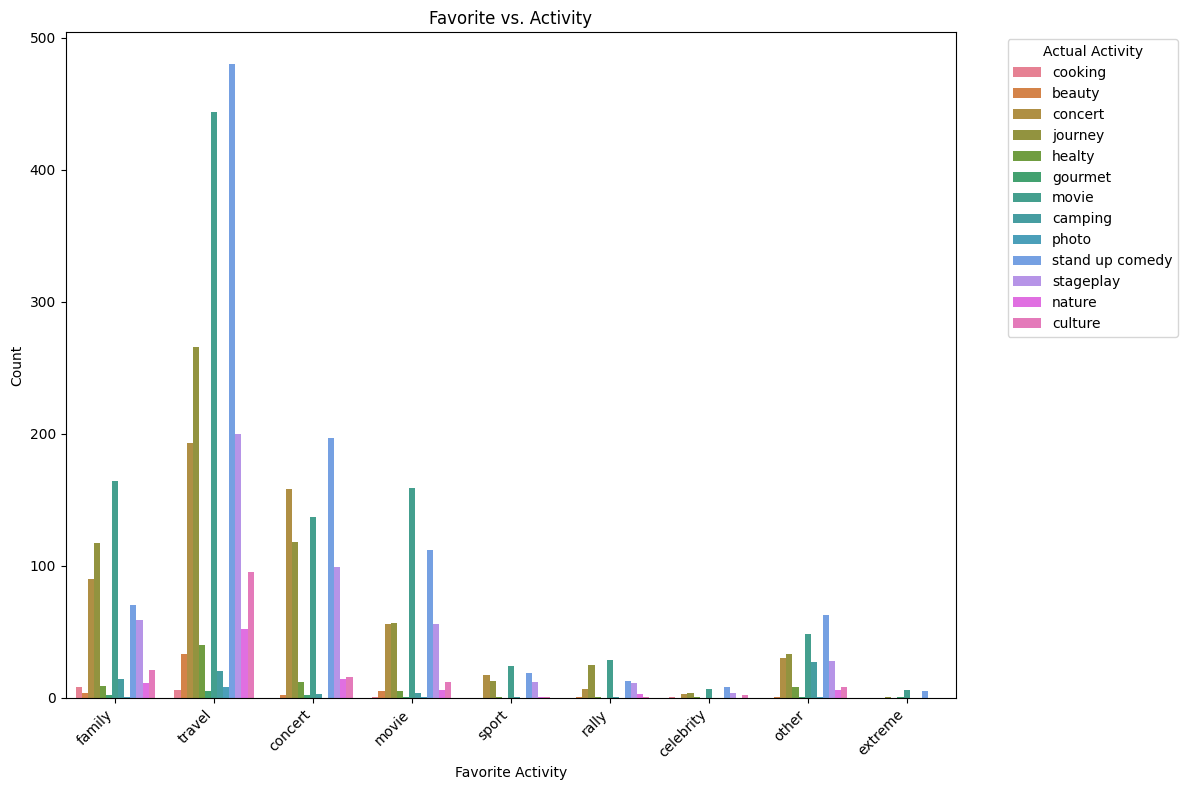

In [ ]:
# Create a countplot to visualize the relationship between 'favorite' and 'activity'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='favorite', hue='activity')
plt.title('Favorite vs. Activity')
plt.xlabel('Favorite Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Actual Activity', bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

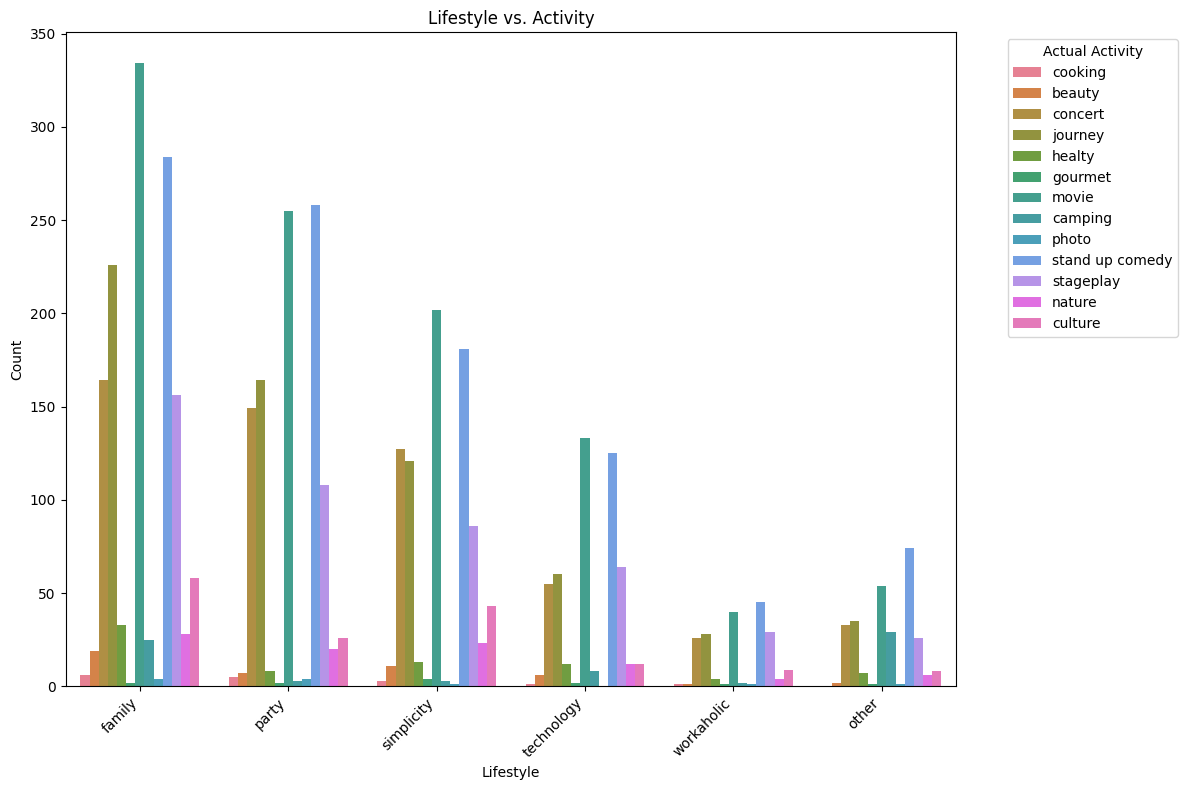

In [ ]:
# Create a countplot to visualize the relationship between 'lifestyle' and 'activity'
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='lifestyle', hue='activity')
plt.title('Lifestyle vs. Activity')
plt.xlabel('Lifestyle')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Actual Activity', bbox_to_anchor=(1.05, 1), loc='upper left') # Add legend outside the plot
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

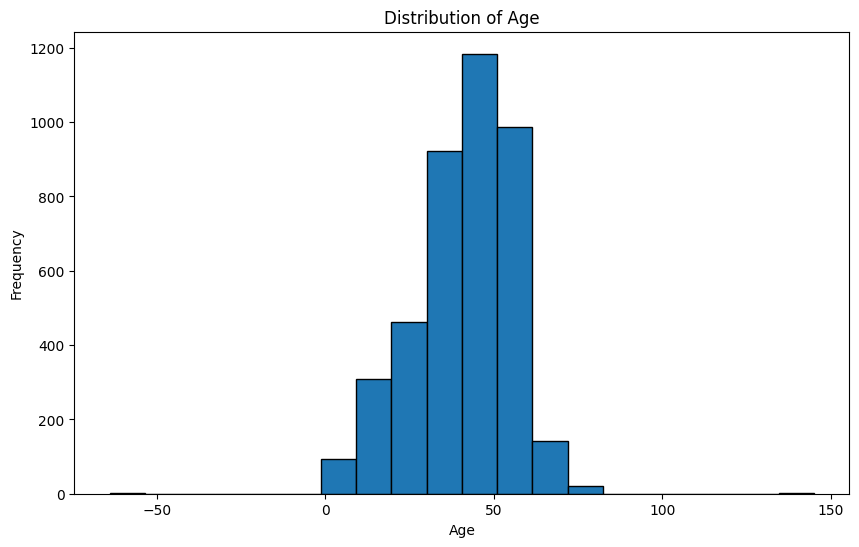

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

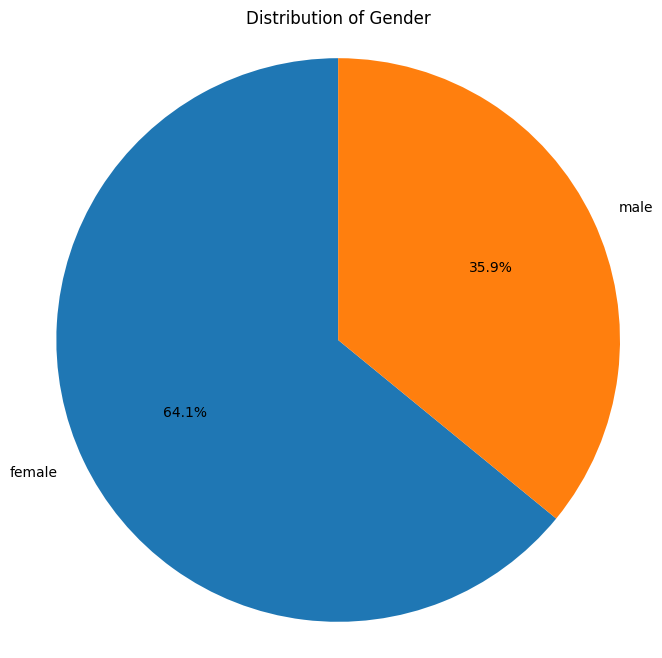

In [ ]:
gender_counts = data['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Gender')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

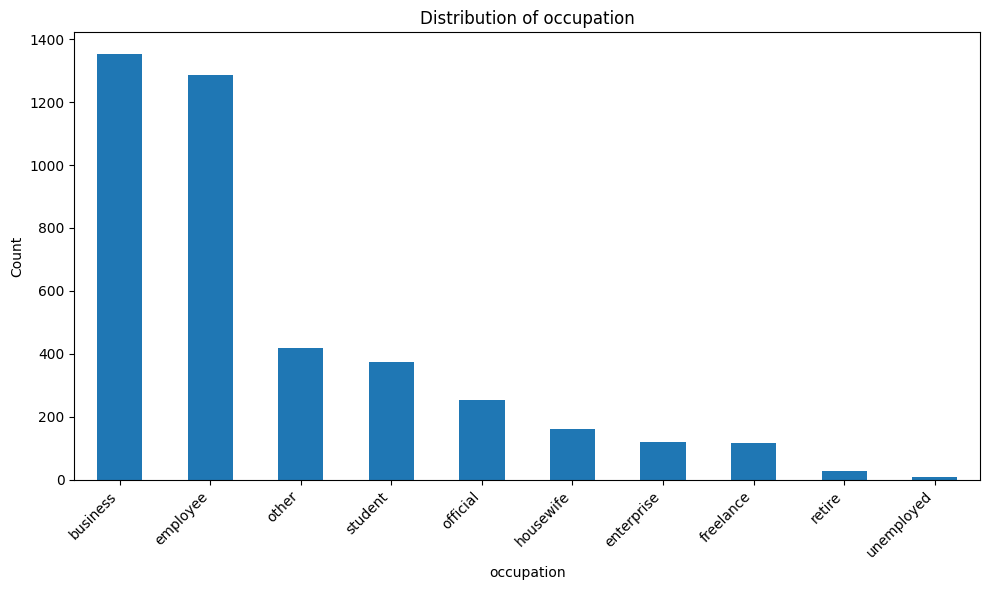

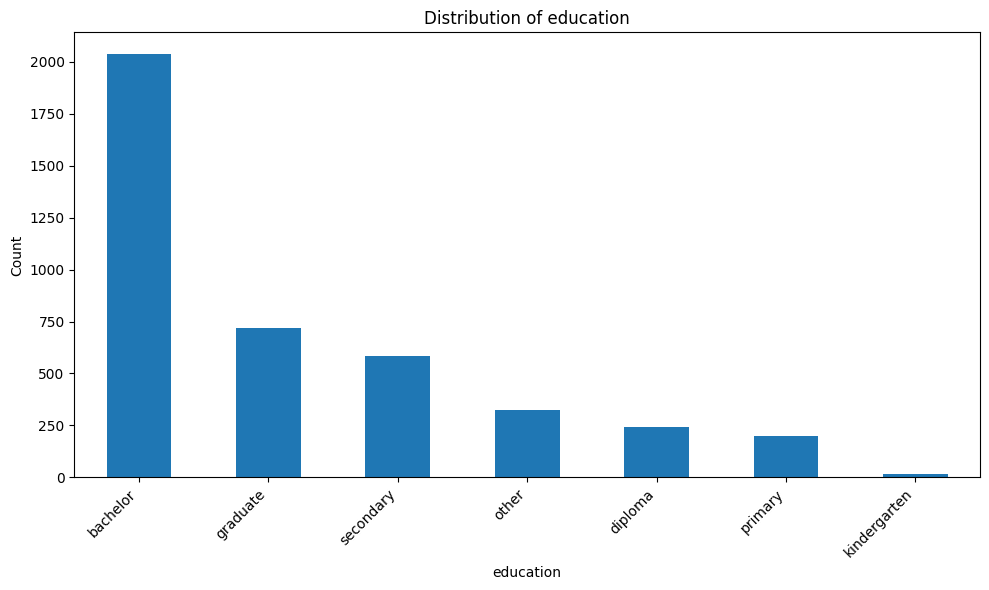

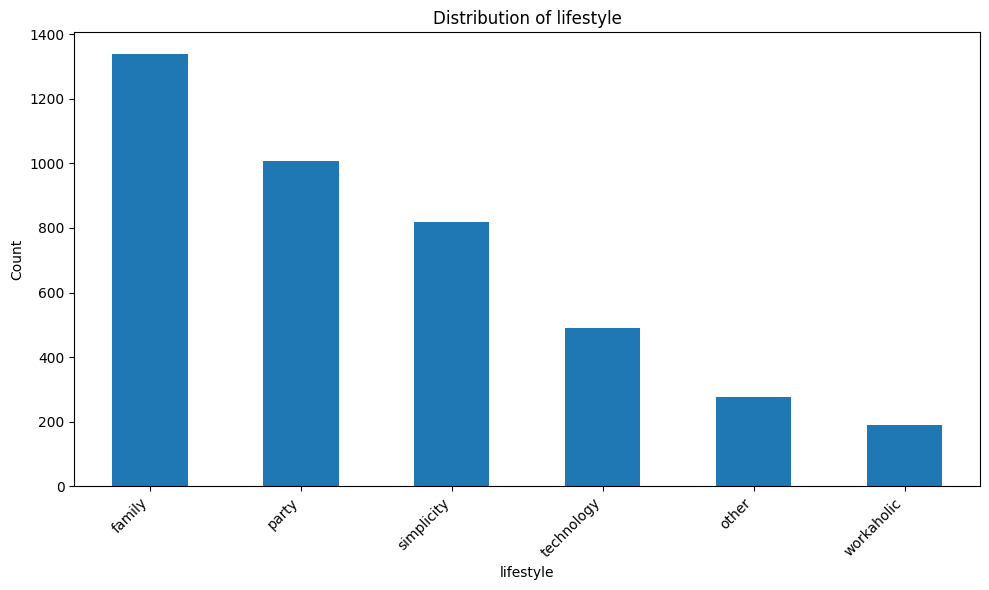

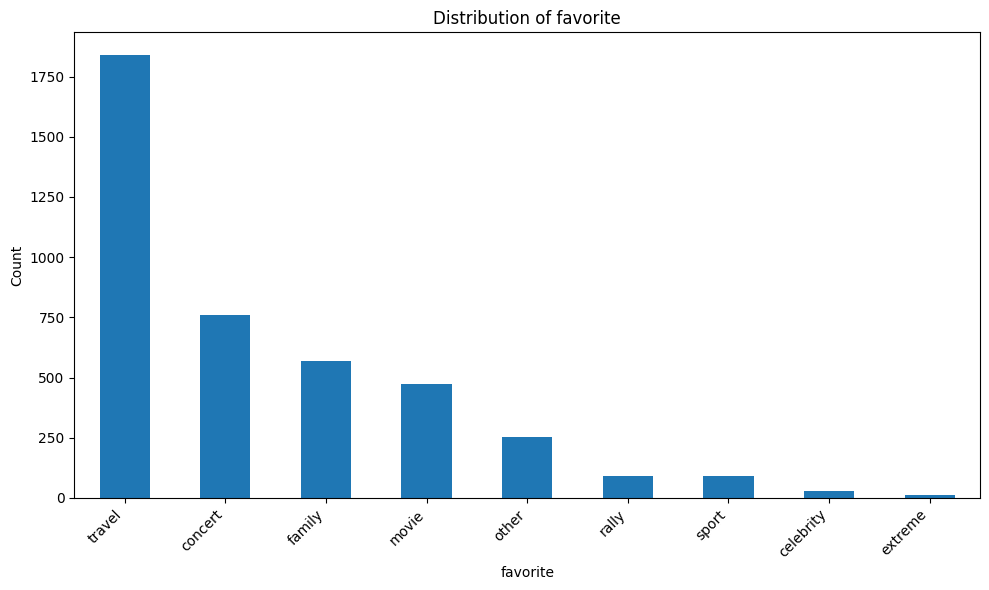

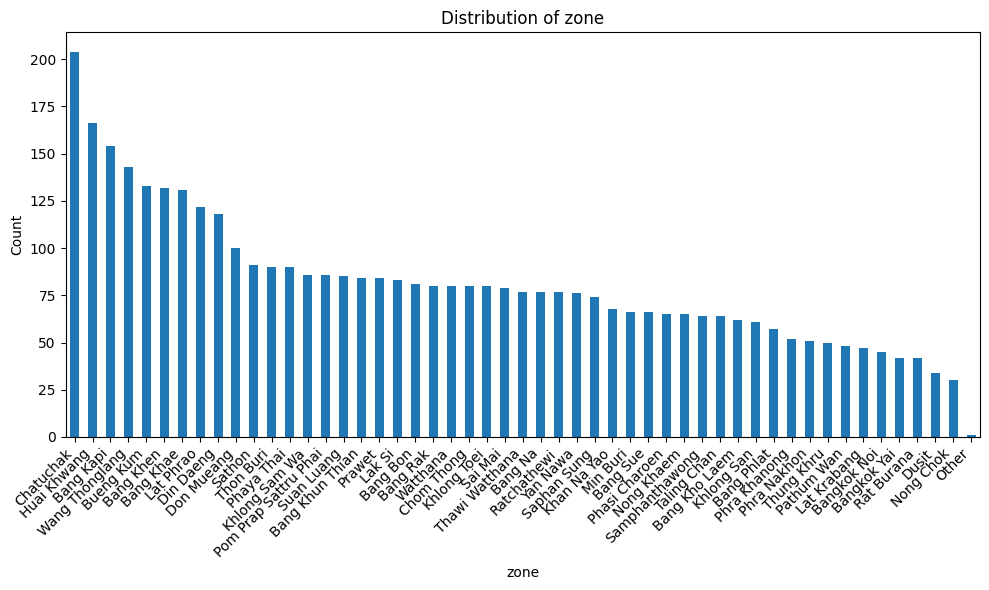

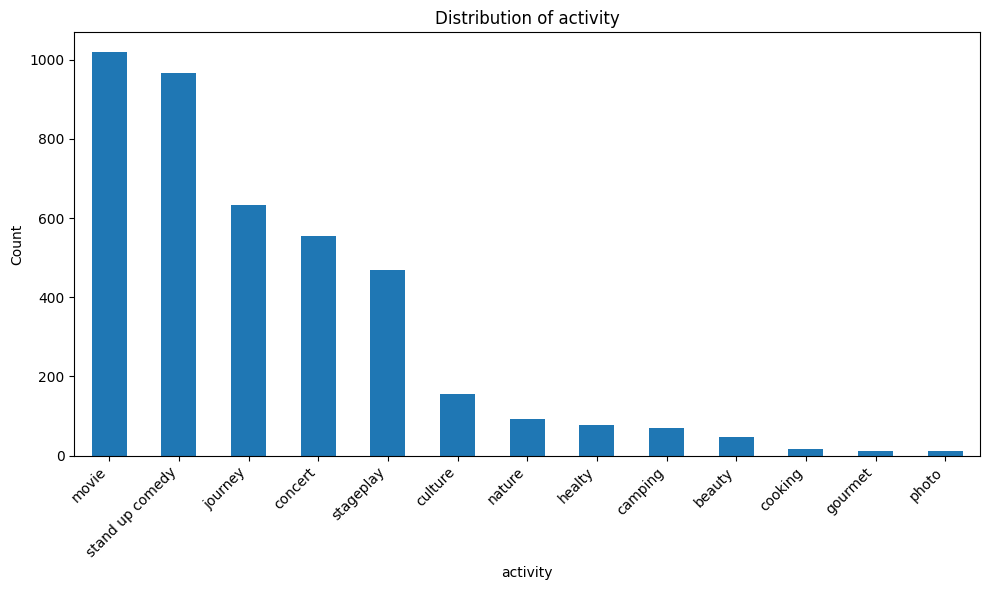

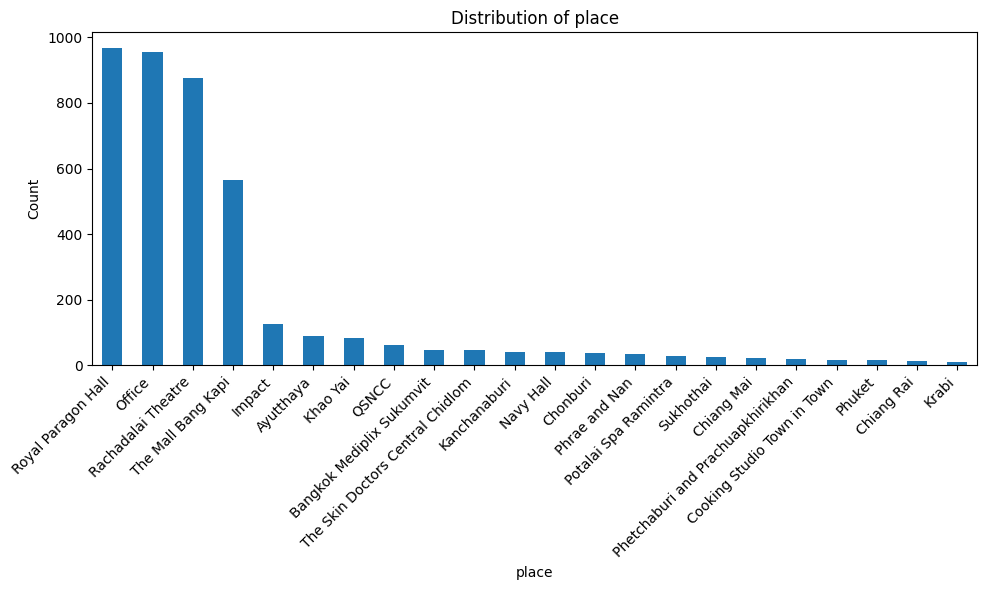

In [ ]:
categorical_cols = ['occupation', 'education', 'lifestyle', 'favorite', 'zone', 'activity', 'place']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    data[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

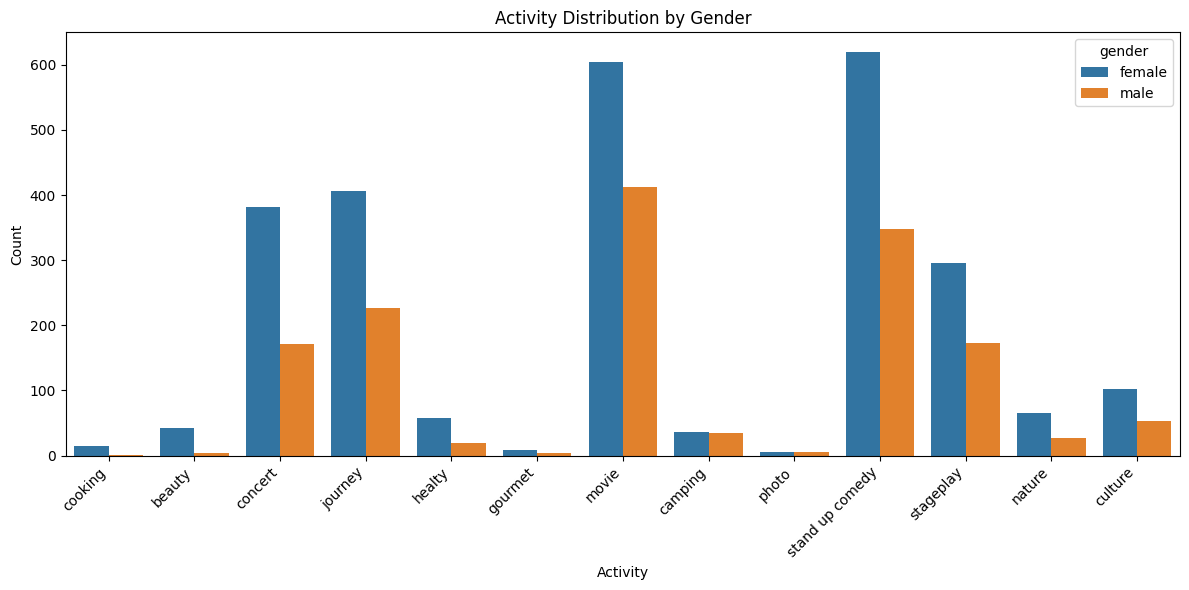

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='activity', hue='gender')
plt.title('Activity Distribution by Gender')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

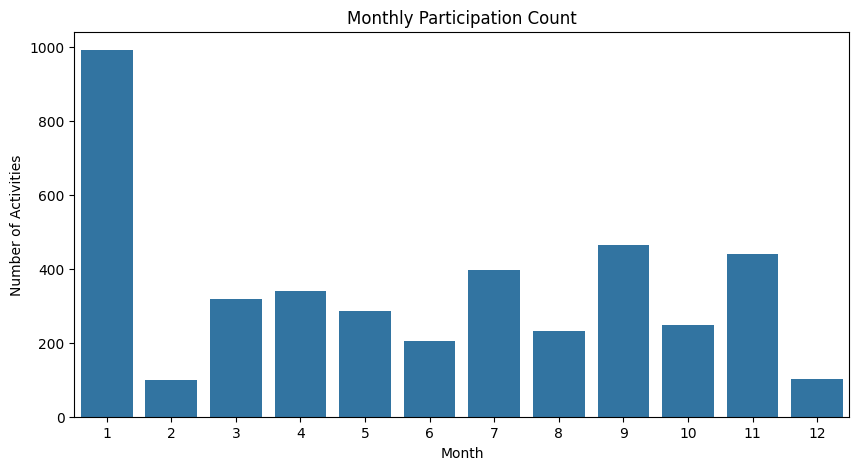

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x="month", data=data)
plt.title("Monthly Participation Count")
plt.xlabel("Month")
plt.ylabel("Number of Activities")
plt.show()

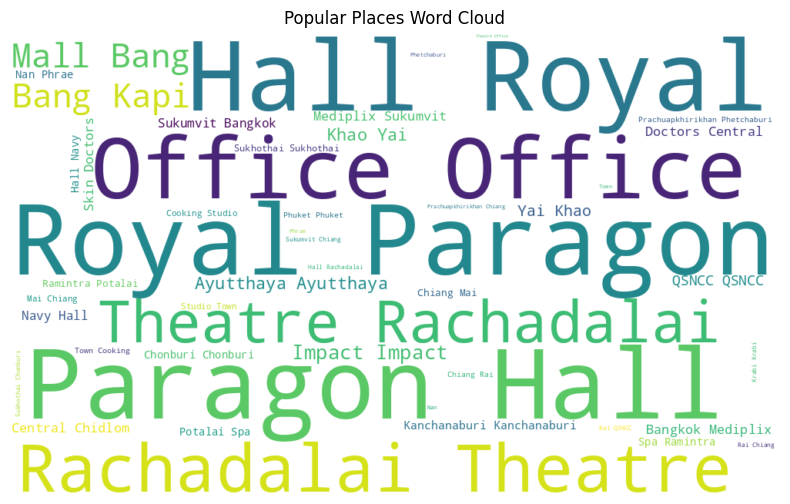

In [ ]:
from wordcloud import WordCloud

text = " ".join(data["place"].astype(str))
wc = WordCloud(width=1000, height=600, background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Popular Places Word Cloud")
plt.show()

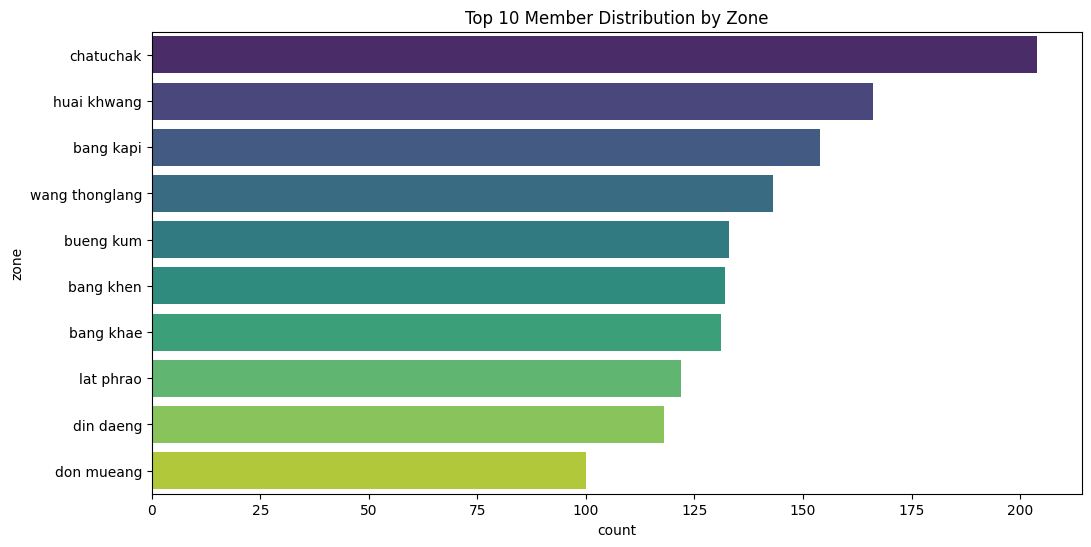

In [31]:
top_zones = data['zone'].value_counts().nlargest(10).index
data_top_zones = data[data['zone'].isin(top_zones)]

plt.figure(figsize=(12,6))
# Add a color palette to the countplot
sns.countplot(y="zone", data=data_top_zones, order=top_zones, palette='viridis')
plt.title("Top 10 Member Distribution by Zone")
plt.show()

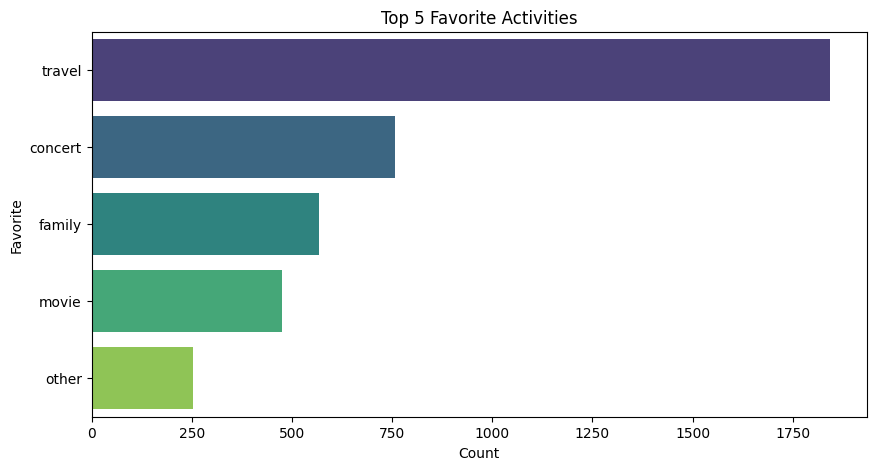

In [32]:
plt.figure(figsize=(10,5))
top_fav = data["favorite"].value_counts().head(5)
sns.barplot(x=top_fav.values, y=top_fav.index, palette='viridis') # Added palette
plt.title("Top 5 Favorite Activities")
plt.xlabel("Count")
plt.ylabel("Favorite")
plt.show()

# Feature Engineering

In [ ]:
def get_zone_cluster(zone):
    """Groups Bangkok zones into broader geographical clusters."""
    central_zones = ['Pathum Wan', 'Bang Rak', 'Sathon', 'Bang Kho Laem', 'Yan Nawa', 'Phaya Thai', 'Ratchathewi', 'Din Daeng', 'Huai Khwang']
    north_zones = ['Chatuchak', 'Lat Phrao', 'Lak Si', 'Don Mueang', 'Sai Mai', 'Bang Khen']
    east_zones = ['Bang Kapi', 'Bueng Kum', 'Khan Na Yao', 'Suan Luang', 'Prawet', 'Bang Na', 'Lat Krabang', 'Saphan Sung', 'Min Buri']
    south_zones = ['Khlong Toei', 'Watthana', 'Phra Khanong']
    thonburi_zones = ['Bangkok Yai', 'Khlong San', 'Thon Buri', 'Bangkok Noi', 'Taling Chan', 'Thawi Watthana', 'Bang Phlat', 'Nong Khaem', 'Bang Khae', 'Phasi Charoen', 'Chom Thong', 'Rat Burana']

    if zone in central_zones:
        return 'Central'
    elif zone in north_zones:
        return 'North'
    elif zone in east_zones:
        return 'East'
    elif zone in south_zones:
        return 'South'
    elif zone in thonburi_zones:
        return 'Thonburi'
    else:
        return 'Other'

def get_place_category(place):
    """Categorizes venues based on their name."""
    place = str(place).lower()
    if 'theatre' in place or 'ratchadalai' in place:
        return 'Theatre'
    elif 'skin' in place or 'doctors' in place:
        return 'Beauty Clinic'
    elif 'cooking' in place or 'studio' in place:
        return 'Cooking School'
    elif 'impact' in place or 'arena' in place:
        return 'Exhibition/Concert Hall'
    elif 'paragon' in place or 'siam' in place:
        return 'Cinema/Mall'
    else:
        return 'Other Venue'

def get_season(month):
    """Determines the season in Thailand based on the month."""
    if month in [3, 4, 5]:
        return 'Hot_Season'
    elif month in [6, 7, 8, 9, 10]:
        return 'Rainy_Season'
    elif month in [11, 12, 1, 2]:
        return 'Cool_Season'
    else:
        return 'Unknown'

def get_age_group(age):
    """Categorizes age into groups."""
    if pd.isna(age):
        return 'Unknown'
    if age < 18:
        return 'Teenager'
    elif 18 <= age <= 29:
        return 'Young Adult'
    elif 30 <= age <= 49:
        return 'Adult'
    elif age >= 50:
        return 'Senior'
    else:
        return 'Unknown'

def is_family_oriented(row):
    """Checks if 'family' is in lifestyle or favorite columns. Returns 1 or 0."""
    # Return 1 (True) or 0 (False) instead of boolean
    return 1 if ((str(row['lifestyle']) == 'family') or (str(row['favorite']) == 'family')) else 0

def get_professional_segment(row):
    """Combines occupation and education into a single segment."""
    return f"{row['occupation']}_{row['education']}"

def create_interaction_features(df):
    """Create meaningful interaction features by combining existing columns."""
    df_new = df.copy()

    # Create new categorical combinations
    df_new['gender_lifestyle'] = df_new['gender'] + '_' + df_new['lifestyle']
    df_new['season_favorite'] = df_new['Season'] + '_' + df_new['favorite']
    df_new['zone_place'] = df_new['Zone_Cluster'] + '_' + df_new['Place_Category']
    df_new['age_education'] = df_new['Age_Group'] + '_' + df_new['education']
    df_new['occupation_lifestyle'] = df_new['occupation'] + '_' + df_new['lifestyle']

    return df_new

# --- Main Script Logic ---
try:
    # Assume 'data' is a DataFrame that has been loaded, e.g., data = pd.read_csv('MemberActivity.csv')

    # --- 1. Basic Feature Engineering ---
    print("--- Starting Basic Feature Engineering ---")
    data['Zone_Cluster'] = data['zone'].apply(get_zone_cluster)
    zone_activity_counts = data['zone'].value_counts()
    data['Zone_Popularity'] = data['zone'].map(zone_activity_counts) / zone_activity_counts.max()
    data['Place_Category'] = data['place'].apply(get_place_category)
    data['Season'] = data['month'].apply(get_season)
    data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
    data['Age_Group'] = data['Age'].apply(get_age_group)

    # FIXED: Now returns 1 or 0 instead of boolean
    data['Is_Family_Oriented'] = data.apply(is_family_oriented, axis=1)

    data['Professional_Segment'] = data.apply(get_professional_segment, axis=1)
    print("Basic features created successfully.")

    # --- 2. Create Interaction Features (using the new basic features) ---
    print("\n--- Creating Interaction Features ---")
    data = create_interaction_features(data)
    print("Interaction features created successfully.")

    # --- 3. Final Steps & Output ---
    output_filename = 'MemberActivity_with_All_Features.csv'
    data.to_csv(output_filename, index=False, encoding='utf-8-sig')

    print(f"\nFeature engineering complete! The new file is saved as '{output_filename}'")
    print("\nHere's a preview of some of the new features:")
    # Updated list to show a mix of basic and interaction features
    new_features_preview = [
        'Zone_Cluster', 'Place_Category', 'Season', 'Age_Group',
        'Is_Family_Oriented', 'gender_lifestyle', 'season_favorite', 'zone_place', 'age_education'
    ]
    print(data[new_features_preview].head())

    # Verify the data type
    print(f"\nData type of 'Is_Family_Oriented': {data['Is_Family_Oriented'].dtype}")

except FileNotFoundError:
    print("Error: Input CSV file not found. Please make sure it's in the same directory.")
except Exception as e:
    print(f"An error occurred: {e}")

--- Starting Basic Feature Engineering ---
Basic features created successfully.

--- Creating Interaction Features ---
Interaction features created successfully.

Feature engineering complete! The new file is saved as 'MemberActivity_with_All_Features.csv'

Here's a preview of some of the new features:
  Zone_Cluster  Place_Category       Season Age_Group  Is_Family_Oriented  \
0        South  Cooking School  Cool_Season     Adult                   1   
1      Central  Cooking School  Cool_Season    Senior                   1   
2        South  Cooking School  Cool_Season     Adult                   1   
3        North  Cooking School  Cool_Season    Senior                   1   
4         East  Cooking School  Cool_Season    Senior                   1   

  gender_lifestyle     season_favorite              zone_place  \
0    female_family  Cool_Season_family    South_Cooking School   
1    female_family  Cool_Season_travel  Central_Cooking School   
2    female_family  Cool_Season_tra

# 2. Read Data

In [ ]:
data = pd.read_csv('MemberActivity_with_All_Features.csv')

# 3. Clean data

In [ ]:
# Select all of your text-based columns
categorical_cols = ['gender', 'occupation', 'education', 'lifestyle', 'favorite', 'zone', 'activity', 'place']

# Loop through each column to apply the cleaning
for col in categorical_cols:
    # 1. Convert to lowercase
    # 2. Remove leading/trailing whitespace
    data[col] = data[col].str.lower().str.strip()

print("All categorical columns have been cleaned! ✨")

All categorical columns have been cleaned! ✨


In [ ]:
data = data[(data['Age'] >= 0) & (data['Age'] <= 100)].copy()

print("\nFiltering successful!")
print(f"Number of rows after filtering: {len(data)}")
print("The 'Age' column now only contains values between 0 and 100.")


Filtering successful!
Number of rows after filtering: 4121
The 'Age' column now only contains values between 0 and 100.


# 4. Spilt data

In [ ]:
columns_to_drop = ['activity', 'Age', 'month', 'Zone_Cluster', 'Place_Category', 'gender_lifestyle', 'season_favorite', 'zone_place', 'age_education']
X = data.drop(columns=columns_to_drop, axis=1)
y = data['activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nTraining set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Training set size: 3296
Test set size: 825


In [ ]:
numerical_features = ['Zone_Popularity', 'Is_Family_Oriented']  # Both numeric now
nominal_features = [col for col in X_train.columns if col not in numerical_features]

In [ ]:
categorical_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
numerical_scaler = StandardScaler()

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_features),
        ('num', StandardScaler(), numerical_features)
    ],
    remainder='drop'
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# --- Step 0: Import libraries and load your data ---
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load sample data (replace this with your actual data loading)
iris = load_iris()
X, y = iris.data, iris.target

# At this point, you would perform your preprocessing on X.
# For this example, we'll just rename it to match your variable.
X_processed = X

# --- Step 1: Split into training+validation (80%) and test (20%) ---
# Now the code will work because X_processed and y are defined.
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 2: Split the 80% into actual training (60%) and validation (20%) ---
# Note: A 0.25 test_size on the 80% of data gives you 20% of the original total.
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val
)

# --- Verify the shapes of your new datasets ---
print("Total original shape:", X_processed.shape)
print("-" * 30)
print("Training set shape:", X_train.shape)   # Should be 60% of total
print("Validation set shape:", X_val.shape) # Should be 20% of total
print("Test set shape:", X_test.shape)       # Should be 20% of total

Total original shape: (150, 4)
------------------------------
Training set shape: (90, 4)
Validation set shape: (30, 4)
Test set shape: (30, 4)


In [ ]:
model_pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(50, 25, 10),
        activation='relu',
        solver='adam',
        alpha=0.001,
        batch_size=32,
        learning_rate='adaptive',
        learning_rate_init=0.001,
        max_iter=500,
        early_stopping=True,
        validation_fraction=0.15,
        n_iter_no_change=10,
        random_state=42,
        verbose=True
    ))
])

In [ ]:
model_pipeline.fit(X_train_processed, y_train_encoded)

Iteration 1, loss = 1.55749293
Validation score: 0.928212
Iteration 2, loss = 0.14713422
Validation score: 0.946474
Iteration 3, loss = 0.08789627
Validation score: 0.952771
Iteration 4, loss = 0.07533536
Validation score: 0.965365
Iteration 5, loss = 0.06929003
Validation score: 0.964106
Iteration 6, loss = 0.06541526
Validation score: 0.969773
Iteration 7, loss = 0.06148480
Validation score: 0.969144
Iteration 8, loss = 0.05717052
Validation score: 0.964736
Iteration 9, loss = 0.05175949
Validation score: 0.968514
Iteration 10, loss = 0.04796507
Validation score: 0.970403
Iteration 11, loss = 0.04349716
Validation score: 0.967254
Iteration 12, loss = 0.04733735
Validation score: 0.969773
Iteration 13, loss = 0.04024305
Validation score: 0.976071
Iteration 14, loss = 0.03341109
Validation score: 0.971033
Iteration 15, loss = 0.03198676
Validation score: 0.977330
Iteration 16, loss = 0.02932689
Validation score: 0.973552
Iteration 17, loss = 0.02981792
Validation score: 0.976071
Iterat

Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('classifier',
                 MLPClassifier(alpha=0.001, batch_size=32, early_stopping=True,
                               hidden_layer_sizes=(50, 25, 10),
                               learning_rate='adaptive', max_iter=500,
                               random_state=42, validation_fraction=0.15,
                               verbose=True))])

In [ ]:
y_pred_train = model_pipeline.predict(X_train_processed)
y_pred_test = model_pipeline.predict(X_test_processed)


RESULTS
Training Accuracy: 0.9860
Test Accuracy: 0.8873

Classification Report:
                 precision    recall  f1-score   support

         beauty       1.00      1.00      1.00         9
        camping       0.92      0.86      0.89        14
        concert       0.64      0.61      0.62       111
        cooking       1.00      1.00      1.00         3
        culture       0.97      1.00      0.98        31
        gourmet       1.00      0.50      0.67         2
         healty       1.00      1.00      1.00        15
        journey       0.98      1.00      0.99       127
          movie       0.99      0.99      0.99       204
         nature       0.89      0.84      0.86        19
          photo       1.00      0.50      0.67         2
      stageplay       0.54      0.56      0.55        94
stand up comedy       0.99      1.00      1.00       194

       accuracy                           0.89       825
      macro avg       0.92      0.84      0.86       825
   we

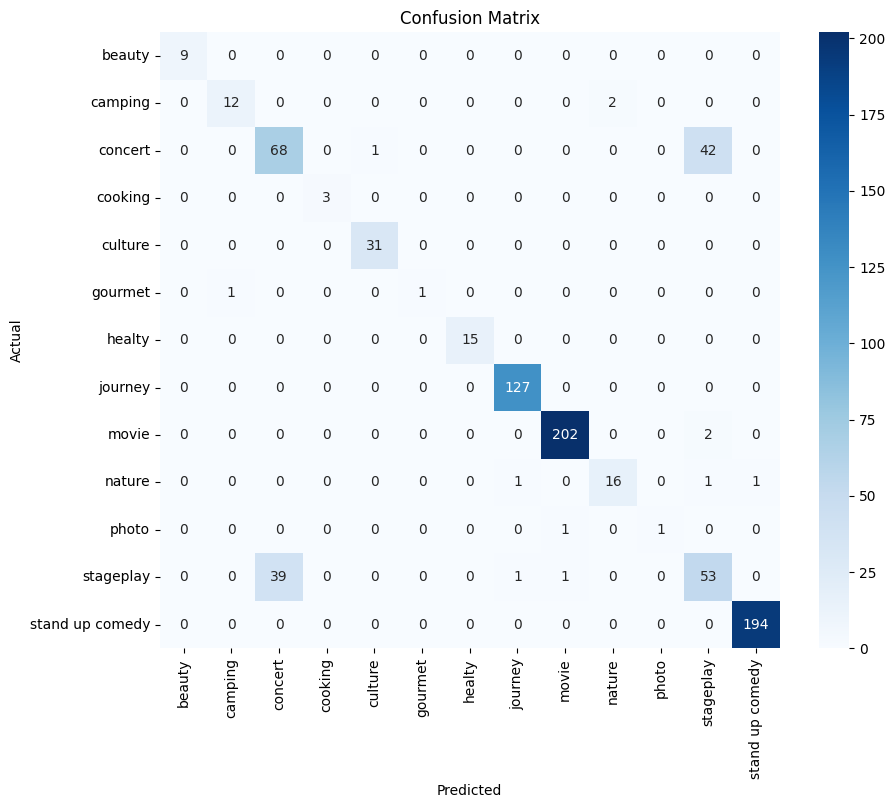

In [ ]:
train_accuracy = accuracy_score(y_train_encoded, y_pred_train)
test_accuracy = accuracy_score(y_test_encoded, y_pred_test)

print(f"\n{'='*60}")
print("RESULTS")
print(f"{'='*60}")
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nClassification Report:")
# Use the encoded y_test_encoded, but specify the original class names
# (from label_encoder.classes_) for readable output.
print(classification_report(
    y_test_encoded,
    y_pred_test,
    target_names=label_encoder.classes_ # Use original string class names here
))

print("\nConfusion Matrix:")
# Use the encoded y_test_encoded and y_pred_test
cm = confusion_matrix(y_test_encoded, y_pred_test)
plt.figure(figsize=(10, 8))
# Set axis labels to the original class names for readability
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=label_encoder.classes_, # Set class names for predicted labels
    yticklabels=label_encoder.classes_  # Set class names for true labels
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


============================================================
RESULTS
============================================================
columns_to_drop = ['activity', 'Age', 'month', 'Zone_Cluster', 'Place_Category', 'gender_lifestyle', 'season_favorite', 'zone_place', 'age_education']

<br>

Training Accuracy: 0.9284
Test Accuracy: 0.8958

Classification Report:
                 precision    recall  f1-score   support

         beauty       1.00      1.00      1.00         9
        camping       0.91      0.71      0.80        14
        concert       0.73      0.44      0.55       111
        cooking       1.00      1.00      1.00         3
        culture       1.00      1.00      1.00        31
        gourmet       0.00      0.00      0.00         2
         healty       0.94      1.00      0.97        15
        journey       1.00      1.00      1.00       127
          movie       1.00      1.00      1.00       204
         nature       0.83      1.00      0.90        19
          photo       1.00      1.00      1.00         2
      stageplay       0.55      0.81      0.66        94
stand up comedy       1.00      1.00      1.00       194

       accuracy                           0.90       825
      macro avg       0.84      0.84      0.84       825
   weighted avg       0.90      0.90      0.89       825


Confusion Matrix:
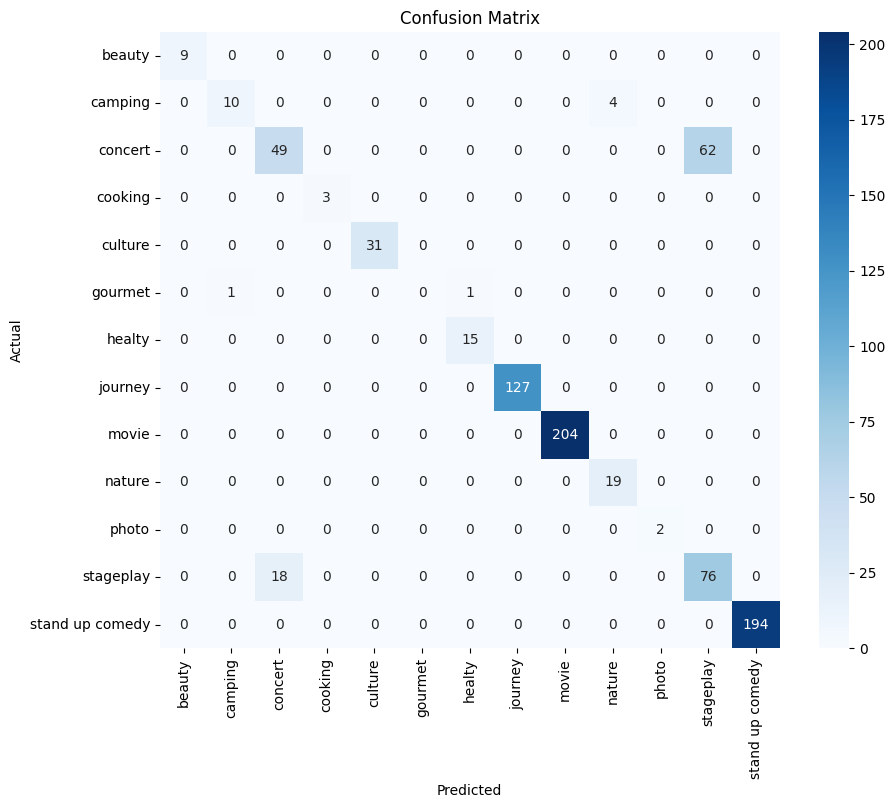


============================================================
RESULTS
============================================================
columns_to_drop = ['activity', 'Age', 'month', 'zone', 'place', 'Zone_Cluster', 'Place_Category']

<br>

Training Accuracy: 0.7693
Test Accuracy: 0.7176

Classification Report:
                 precision    recall  f1-score   support

         beauty       1.00      0.11      0.20         9
        camping       0.50      0.36      0.42        14
        concert       0.72      0.32      0.45       111
        cooking       0.00      0.00      0.00         3
        culture       0.29      0.19      0.23        31
        gourmet       0.00      0.00      0.00         2
         healty       0.00      0.00      0.00        15
        journey       0.62      0.80      0.69       127
          movie       0.76      0.82      0.79       204
         nature       0.00      0.00      0.00        19
          photo       0.00      0.00      0.00         2
      stageplay       0.52      0.86      0.65        94
stand up comedy       0.98      1.00      0.99       194

       accuracy                           0.72       825
      macro avg       0.41      0.34      0.34       825
   weighted avg       0.70      0.72      0.69       825


Confusion Matrix:
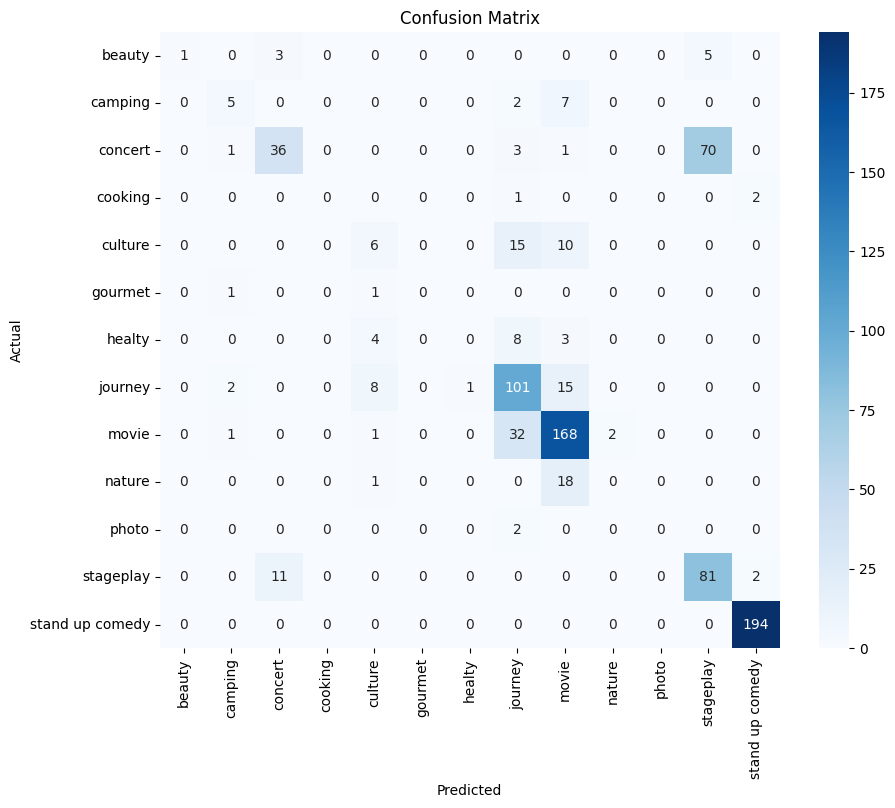

In [ ]:
# 3. SAVE YOUR BEST MODEL (THE MLP)
print("\n=== Saving the Trained MLP Model ===")

# Correct variable name from 'best_model' to 'model_pipeline'
joblib.dump(model_pipeline, 'mlp_activity_predictor.pkl')

print("MLP model saved successfully as 'mlp_activity_predictor.pkl'")
# You can later load it with: loaded_model = joblib.load('mlp_activity_predictor.pkl')


=== Saving the Trained MLP Model ===
MLP model saved successfully as 'mlp_activity_predictor.pkl'


## Find best fine-tune

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found: {'classifier__activation': 'tanh', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 25)}
Best cross-validation accuracy: 0.9950

--- Test Set Evaluation ---
Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00        47

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:


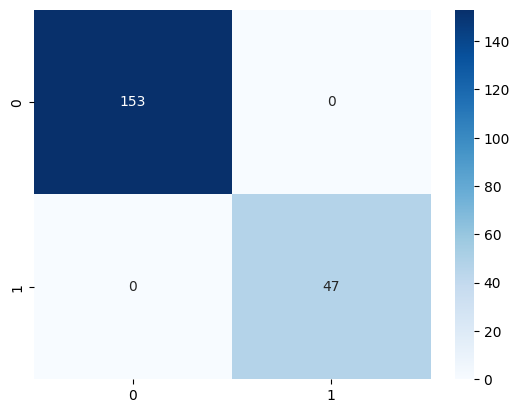

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# --- 1. Create Sample Data (CRITICAL STEP) ---
# Your data MUST be a pandas DataFrame with column names.
# This is what your preprocessor will use.
numerical_features = ['age', 'monthly_income']
categorical_features = ['city', 'gender']
feature_names = numerical_features + categorical_features

X = pd.DataFrame({
    'age': np.random.randint(20, 65, 1000),
    'monthly_income': np.random.randint(25000, 150000, 1000),
    'city': np.random.choice(['New York', 'London', 'Tokyo'], 1000),
    'gender': np.random.choice(['Male', 'Female'], 1000)
})
# Create an imbalanced target variable
y = pd.Series(np.where(X['monthly_income'] > 120000, 1, 0))

# --- 2. Define the Preprocessor ---
# This preprocessor uses column names to apply the correct transformer.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' # Important if you have columns you don't transform
)

# --- 3. Split the Data ---
# When you split a DataFrame, the result is still a DataFrame. This is key.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 4. Your Pipeline and GridSearchCV (Unchanged) ---
# This code was already correct. It now works because X_train is a DataFrame.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampler', SMOTE(random_state=42)),
    ('classifier', MLPClassifier(random_state=42, max_iter=500))
])

param_grid = {
    'classifier__hidden_layer_sizes': [(50, 25), (30,)],
    'classifier__activation': ['relu', 'tanh'],
    'classifier__alpha': [0.0001, 0.001],
}

grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# --- 5. Evaluate the best model (Unchanged) ---
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n--- Test Set Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()